# Summary
After performing the analysis of the data provided, the following study findings were reached:
Based on the tumor size and the Drug Regimine mouses were treated, Capomulin and Ramicane seems to be the most effective treatments after the Tumor in sizes in avergae were the smollest and with the minor std between the tumor sizes in comparison with other treatments. 
Another finding on the sudy was that it seems to be a positive correlation between the mouse weight and the tumor volume.






In [161]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


In [7]:
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

In [8]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [152]:
# Combine the data into a single dataset
combined_study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_study_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [10]:
Drug_Regimen_D = combined_study_data[["Drug Regimen", "Tumor Volume (mm3)"]]
Drug_Regimen_D.head()

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729


In [11]:
df=pd.DataFrame(Drug_Regimen_D)
df

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
...,...,...
1888,Naftisol,63.145652
1889,Naftisol,65.841013
1890,Naftisol,69.176246
1891,Naftisol,70.314904


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Drug_Regimen_DF = round(df.groupby(["Drug Regimen"]).agg(['count','mean','median','var','std','sem']),2)
Drug_Regimen_DF

Tumor Volume (mm3)                                 
                          count   mean median    var   std   sem
Drug Regimen                                                    
Capomulin                   230  40.68  41.56  24.95  4.99  0.33
Ceftamin                    178  52.59  51.78  39.29  6.27  0.47
Infubinol                   178  52.88  51.82  43.13  6.57  0.49
Ketapril                    188  55.24  53.70  68.55  8.28  0.60
Naftisol                    186  54.33  52.51  66.17  8.13  0.60
Placebo                     181  54.03  52.29  61.17  7.82  0.58
Propriva                    161  52.32  50.85  42.35  6.51  0.51
Ramicane                    228  40.22  40.67  23.49  4.85  0.32
Stelasyn                    181  54.23  52.43  59.45  7.71  0.57
Zoniferol                   182  53.24  51.82  48.53  6.97  0.52

## Bar Plots

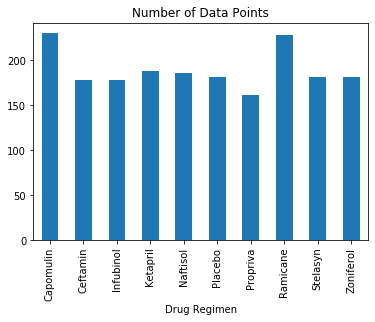

In [62]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

Drug_Regimen_Bar_Plot=df.groupby("Drug Regimen")["Tumor Volume (mm3)"].count().plot(kind="bar")
plt.title("Number of Data Points")
plt.show()

In [61]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot





SyntaxError: invalid syntax (<ipython-input-61-043487f12268>, line 3)

## Pie Plots

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df3=pd.DataFrame(combined_study_data)
df3


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [56]:
Gender_D = combined_study_data.groupby(["Sex"])
Gender_DF = (Gender_D["Mouse ID"]).count()
Gender_DF

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

In [57]:
Gender_summary_df = pd.DataFrame({"Total by Gender":Gender_DF
                                 })
Gender_summary_df

,Total by Gender
Sex,
Female,935
Male,958


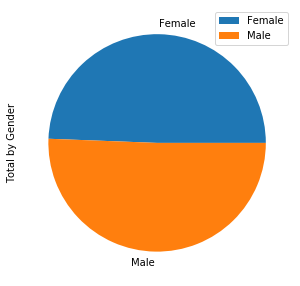

In [85]:
df = pd.DataFrame({'Total by Gender': [935,958]},
                   index=['Female', 'Male'])
plot = df.plot.pie(y='Total by Gender', figsize=(5, 5))

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [90]:
df2=pd.DataFrame(combined_study_data)
df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [111]:
Capomulin = df2.loc[:,'Drug Regimen']=='Capomulin'
df_Capomulin = df2.loc[Capomulin]
df_Capomulin
df_Capomulin= df_Capomulin.sort_values(["Timepoint"], ascending=True)
df_Capomulin


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
60,f966,Capomulin,Male,16,17,0,45.000000,0
351,g316,Capomulin,Female,22,22,0,45.000000,0
95,u364,Capomulin,Male,18,17,0,45.000000,0
341,v923,Capomulin,Female,19,21,0,45.000000,0
...,...,...,...,...,...,...,...,...
134,r554,Capomulin,Female,8,17,45,32.377357,3
360,g316,Capomulin,Female,22,22,45,40.159220,2
39,m601,Capomulin,Male,22,17,45,28.430964,1
337,j119,Capomulin,Female,7,23,45,38.125164,1


In [105]:
df_Capomulin_sort = df_Capomulin.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
df_Capomulin_sort.head()

Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
Name: Tumor Volume (mm3), dtype: float64

In [106]:
df_Capomulin_df = df_Capomulin_sort.to_frame()
df_Capomulin_df

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
             i557               47.685963
             i738               37.311846
             j119               38.125164
             j246               38.753265
             l509               41.483008
             l897               38.846876
             m601               28.430964
             m957               33.329098
             r157               46.539206
             r554               32.377357
             r944               41.581521
             s185               23.343598
             s710               40.728578
             t565               34.455298
             u364               31.023923
             v923               40.658124
             w150               39.952347
             w914               36.041047
             x401               28.484033
             y793               31.896238

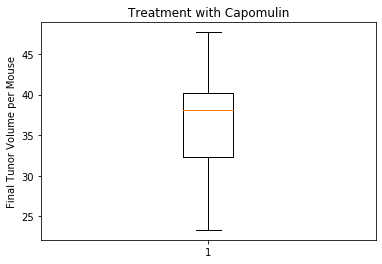

In [115]:
fig1, ax1 = plt.subplots()
ax1.set_title('Treatment with Capomulin')
ax1.set_ylabel('Final Tumor Volume per Mouse')
ax1.boxplot(df_Capomulin_sort)
plt.show()

In [116]:
quartiles = df_Capomulin_sort.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 40.1592203
The interquartile range of Tumor Volume is: 7.781863460000004
The the median of Tumor Volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [119]:
Ramicane = df2.loc[:,'Drug Regimen']=='Ramicane'
df_Ramicane = df2.loc[Ramicane]
df_Ramicane
df_Ramicane= df_Ramicane.sort_values(["Timepoint"], ascending=True)
df_Ramicane

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
401,u196,Ramicane,Male,18,25,0,45.000000,0
65,m546,Ramicane,Male,18,16,0,45.000000,0
391,e662,Ramicane,Male,8,24,0,45.000000,0
318,a411,Ramicane,Male,3,22,0,45.000000,0
...,...,...,...,...,...,...,...,...
59,s508,Ramicane,Male,1,17,45,30.276232,0
49,g791,Ramicane,Male,11,16,45,29.128472,1
400,e662,Ramicane,Male,8,24,45,40.659006,2
214,a520,Ramicane,Male,13,21,45,38.810366,1


In [120]:
df_Ramicane_sort = df_Ramicane.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
df_Ramicane_sort.head()

Drug Regimen  Mouse ID
Ramicane      a411        38.407618
              a444        43.047543
              a520        38.810366
              a644        32.978522
              c458        38.342008
Name: Tumor Volume (mm3), dtype: float64

In [121]:
df_Ramicane_df = df_Ramicane_sort.to_frame()
df_Ramicane_df

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Ramicane     a411               38.407618
             a444               43.047543
             a520               38.810366
             a644               32.978522
             c458               38.342008
             c758               33.397653
             d251               37.311236
             e662               40.659006
             g791               29.128472
             i177               33.562402
             i334               36.374510
             j913               31.560470
             j989               36.134852
             k403               22.050126
             m546               30.564625
             n364               31.095335
             q597               45.220869
             q610               36.561652
             r811               37.225650
             r921               43.419381
             s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

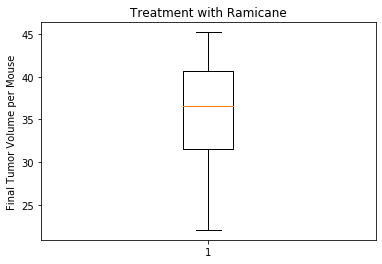

In [128]:
fig1, ax1 = plt.subplots()
ax1.set_title('Treatment with Ramicane')
ax1.set_ylabel('Final Tumor Volume per Mouse')
ax1.boxplot(df_Ramicane_sort)
plt.show()

In [124]:
quartiles = df_Ramicane_sort.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume is: 31.56046955
The upper quartile of Tumor Volume is: 40.65900627
The interquartile range of Tumor Volume is: 9.098536719999998
The the median of Tumor Volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [125]:
Ceftamin = df2.loc[:,'Drug Regimen']=='Ceftamin'
df_Ceftamin = df2.loc[Ceftamin]
df_Ceftamin
df_Ceftamin= df_Ceftamin.sort_values(["Timepoint"], ascending=True)
df_Ceftamin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
1024,k210,Ceftamin,Male,15,28,0,45.000000,0
984,j296,Ceftamin,Female,24,30,0,45.000000,0
1251,o287,Ceftamin,Male,2,28,0,45.000000,0
939,h531,Ceftamin,Male,5,27,0,45.000000,0
...,...,...,...,...,...,...,...,...
1379,p438,Ceftamin,Female,11,26,45,61.433892,1
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1670,w151,Ceftamin,Male,24,25,45,67.527482,3
1112,l471,Ceftamin,Female,7,28,45,67.748662,1


In [126]:
df_Ceftamin_sort = df_Ceftamin.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
df_Ceftamin_sort.head()

Drug Regimen  Mouse ID
Ceftamin      a275        62.999356
              b447        45.000000
              b487        56.057749
              b759        55.742829
              f436        48.722078
Name: Tumor Volume (mm3), dtype: float64

In [127]:
df_Ceftamin_df = df_Ceftamin_sort.to_frame()
df_Ceftamin_df

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Ceftamin     a275               62.999356
             b447               45.000000
             b487               56.057749
             b759               55.742829
             f436               48.722078
             h531               47.784682
             j296               61.849023
             k210               68.923185
             l471               67.748662
             l490               57.918381
             l558               46.784535
             l661               59.851956
             l733               64.299830
             o287               59.741901
             p438               61.433892
             q483               64.192341
             t573               45.000000
             u149               52.925348
             u153               45.000000
             w151               67.527482
             x226               45.000000
             x581               64.634949
             x822               61.386660
             y769               68.594745
             y865               64.729837

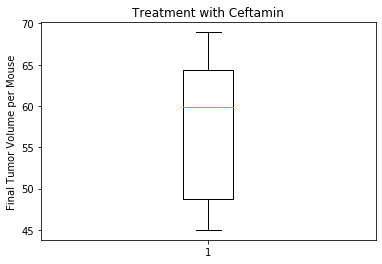

In [130]:
fig1, ax1 = plt.subplots()
ax1.set_title('Treatment with Ceftamin')
ax1.set_ylabel('Final Tumor Volume per Mouse')
ax1.boxplot(df_Ceftamin_sort)
plt.show()

In [131]:
quartiles = df_Ceftamin_sort.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume is: 48.72207785
The upper quartile of Tumor Volume is: 64.29983003
The interquartile range of Tumor Volume is: 15.577752179999997
The the median of Tumor Volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [135]:
Propiva = df2.loc[:,'Drug Regimen']=='Propriva'
df_Propiva = df2.loc[Propiva]
df_Propiva
df_Propiva= df_Propiva.sort_values(["Timepoint"], ascending=True)
df_Propiva

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
541,a699,Propriva,Female,5,28,0,45.000000,0
1594,u946,Propriva,Male,5,30,0,45.000000,0
1531,t198,Propriva,Male,22,26,0,45.000000,0
894,g570,Propriva,Male,16,29,0,45.000000,0
1486,s141,Propriva,Male,8,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
550,a699,Propriva,Female,5,28,45,62.191414,1
1290,o562,Propriva,Female,4,25,45,72.455421,2
1658,v991,Propriva,Female,10,30,45,70.167749,4
1540,t198,Propriva,Male,22,26,45,64.911363,4


In [137]:
df_Propriva_sort = df_Propiva.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
df_Propriva_sort.head()

Drug Regimen  Mouse ID
Propriva      a699        62.191414
              c927        64.183229
              g558        61.774963
              g570        70.492788
              g989        62.570880
Name: Tumor Volume (mm3), dtype: float64

In [139]:
df_Propriva_df = df_Propriva_sort.to_frame()
df_Propriva_df

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Propriva     a699               62.191414
             c927               64.183229
             g558               61.774963
             g570               70.492788
             g989               62.570880
             i635               58.633404
             k603               50.180109
             l215               53.653970
             n482               45.000000
             n630               46.099100
             n678               49.145709
             o523               47.081086
             o562               72.455421
             p310               55.341834
             r107               58.406473
             s141               55.841410
             s187               60.008783
             t198               64.911363
             u946               49.110050
             v991               70.167749
             w350               64.957562
             w746               49.453270
             x111               49.122969
             x209               48.929895
             z435               48.710661

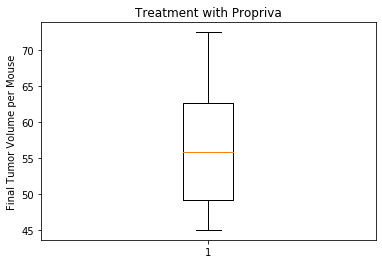

In [141]:
fig1, ax1 = plt.subplots()
ax1.set_title('Treatment with Propriva')
ax1.set_ylabel('Final Tumor Volume per Mouse')
ax1.boxplot(df_Propriva_sort)
plt.show()

In [142]:
quartiles = df_Propriva_sort.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume is: 49.12296898
The upper quartile of Tumor Volume is: 62.57087961
The interquartile range of Tumor Volume is: 13.447910629999996
The the median of Tumor Volume is: 55.84141007 
Values below 28.95110303500001 could be outliers.
Values above 82.742745555 could be outliers.


## Line and Scatter Plots

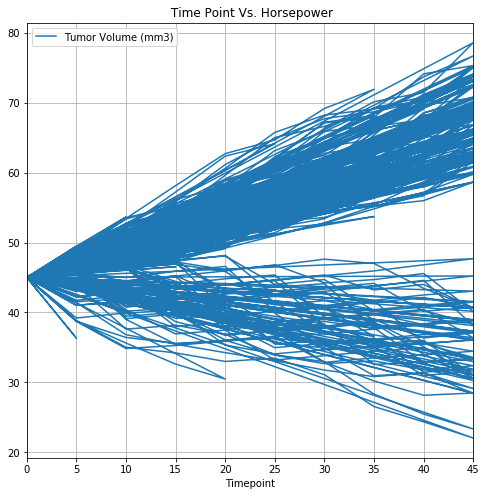

In [164]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
df2.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title=" Time Point Vs. Horsepower")
plt.show()




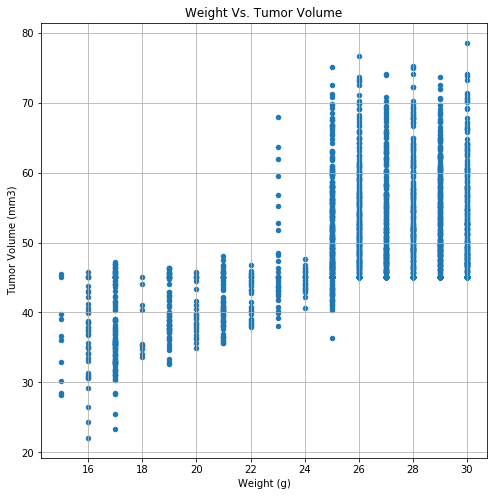

In [146]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
df2.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Weight Vs. Tumor Volume")
plt.show()

In [148]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
weight = df2.iloc[:,4]
volume = df2.iloc[:,6]
correlation = st.pearsonr(weight,volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")




The correlation between both factors is 0.59


The correlation between both factors is 0.59


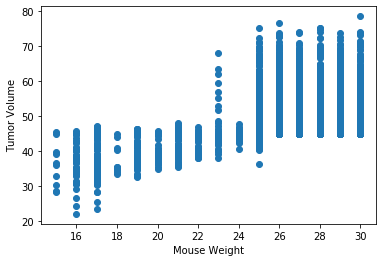

In [149]:
plt.scatter(weight,volume)
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [160]:
data = combined_study_data
data_2 = pd.DataFrame(data=data.data,columns=data.feature_names)
data_2['Tumor Volume (mm3)'] = data.target

AttributeError: 'DataFrame' object has no attribute 'data'

In [162]:
x_values = combined_study_data['Weight (g)']
y_values = combined_study_data['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

NameError: name 'linregress' is not defined